# Fronteira eficiente em um portifólio

Contribuidores:
- Adriano Alvim
- Carlos Cahu
- Davi Galati
- Edson Grimello
- Gabriel D'Agosto
- Gabriel Padilha

In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.optimize as solver
from functions import read_infomoney,calc_return, f_obj_min_risk,f_obj_max_ret
sns.set()

In [2]:
# dicionário de ativos
assets = {
      'ABEV3': 'Ambev SA ABEV3 - Histórico InfoMoney.csv',
      'PETR3': 'Petrobras PETR3 - Histórico InfoMoney.csv',
      'MGLU3': 'Magazine Luiza MGLU3 - Histórico InfoMoney.csv',
      'ITUB3': 'Itaú Unibanco ITUB3 - Histórico InfoMoney.csv',
#      'ALPA3': 'Alpargatas ALPA3 - Histórico InfoMoney.csv',
      'VALE3': 'Vale S.A. VALE3 - Histórico InfoMoney.csv'
}
assets

{'ABEV3': 'Ambev SA ABEV3 - Histórico InfoMoney.csv',
 'PETR3': 'Petrobras PETR3 - Histórico InfoMoney.csv',
 'MGLU3': 'Magazine Luiza MGLU3 - Histórico InfoMoney.csv',
 'ITUB3': 'Itaú Unibanco ITUB3 - Histórico InfoMoney.csv',
 'VALE3': 'Vale S.A. VALE3 - Histórico InfoMoney.csv'}

In [3]:
# consolidar os dados em um único DataFrame
df_assets = pd.DataFrame()
for i in assets:
    df_assets[i] = read_infomoney(assets[i])['FECHAMENTO']

df_assets

,ABEV3,PETR3,MGLU3,ITUB3,VALE3
DATA,,,,,
28/12/2018,13.99,20.27,5.59,20.52,40.76
27/12/2018,13.73,19.51,5.38,20.14,39.56
26/12/2018,13.77,19.62,5.46,19.81,40.31
21/12/2018,13.80,19.26,5.65,20.01,40.65
20/12/2018,13.83,19.24,5.50,20.35,39.81
...,...,...,...,...,...
08/01/2018,19.08,14.32,2.42,17.01,33.20
05/01/2018,19.11,14.10,2.42,17.11,32.48
04/01/2018,19.04,13.99,2.47,16.99,31.98


In [4]:
df_returns = calc_return(df_assets, -1) # calculando retorno diário
df_returns

,ABEV3,PETR3,MGLU3,ITUB3,VALE3
DATA,,,,,
28/12/2018,0.018937,0.038954,0.039033,0.018868,0.030334
27/12/2018,-0.002905,-0.005607,-0.014652,0.016658,-0.018606
26/12/2018,-0.002174,0.018692,-0.033628,-0.009995,-0.008364
21/12/2018,-0.002169,0.001040,0.027273,-0.016708,0.021100
20/12/2018,-0.012848,-0.024341,0.005484,0.003947,-0.004003
...,...,...,...,...,...
09/01/2018,-0.003145,0.000000,-0.024793,-0.014109,-0.003614
08/01/2018,-0.001570,0.015603,0.000000,-0.005845,0.022167
05/01/2018,0.003676,0.007863,-0.020243,0.007063,0.015635


In [5]:
# calcular retorno médio e desvio-padrão médio dos retornos
mi = df_returns.mean() # média dos retornos
sigma = df_returns.std() # desvio-padrão dos retornos

print('Retorno Médio')
print(mi)
print()
print('Desvio-Padrão dos Retornos')
print(sigma)

Retorno Médio
ABEV3   -0.001183
PETR3    0.002088
MGLU3    0.003857
ITUB3    0.000988
VALE3    0.001201
dtype: float64

Desvio-Padrão dos Retornos
ABEV3    0.013610
PETR3    0.030809
MGLU3    0.030383
ITUB3    0.016562
VALE3    0.020712
dtype: float64


In [6]:
# calcular matriz de correlação e de covariância dos retornos dos ativos
correl_matrix = df_returns.corr()
cov_matrix = df_returns.cov()

print('Matriz de Correlação dos Retornos dos Ativos')
print(correl_matrix)
print()
print('Matriz de Covariância dos Retornos dos Ativos')
print(cov_matrix)

Matriz de Correlação dos Retornos dos Ativos
          ABEV3     PETR3     MGLU3     ITUB3     VALE3
ABEV3  1.000000  0.189402  0.253537  0.366211  0.275809
PETR3  0.189402  1.000000  0.309332  0.463841  0.242256
MGLU3  0.253537  0.309332  1.000000  0.405856  0.194290
ITUB3  0.366211  0.463841  0.405856  1.000000  0.185306
VALE3  0.275809  0.242256  0.194290  0.185306  1.000000

Matriz de Covariância dos Retornos dos Ativos
          ABEV3     PETR3     MGLU3     ITUB3     VALE3
ABEV3  0.000185  0.000079  0.000105  0.000083  0.000078
PETR3  0.000079  0.000949  0.000290  0.000237  0.000155
MGLU3  0.000105  0.000290  0.000923  0.000204  0.000122
ITUB3  0.000083  0.000237  0.000204  0.000274  0.000064
VALE3  0.000078  0.000155  0.000122  0.000064  0.000429


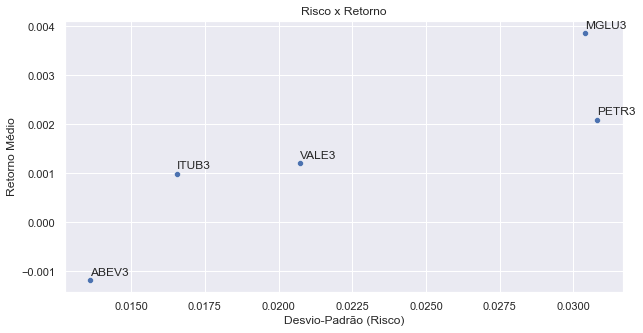

In [7]:
# gráfico de risco x retorno dos ativos
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=sigma, y=mi)
plt.title('Risco x Retorno')
plt.xlabel('Desvio-Padrão (Risco)')
plt.ylabel('Retorno Médio')
for i, name in enumerate(mi.index.values): # identificando os pontos no gráfico
    plt.annotate(name, (sigma[i], mi[i]+1e-4))
plt.show()

In [8]:
# definir pesos iguais para compor carteira de ativos
w = np.array([1/len(mi)]*len(mi))
w

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
# calcular risco e retorno da carteira com pesos iguais
mi_p = np.sum(w*mi)
sigma_p = np.sqrt(np.dot(w, np.dot(cov_matrix, w)))
print(f'Retorno médio esperado da carteira: {round(mi_p*100, 4)}%\nRisco (desvio-padrão) da carteira: {round(sigma_p*100, 4)}%')

Retorno médio esperado da carteira: 0.139%
Risco (desvio-padrão) da carteira: 1.4955%


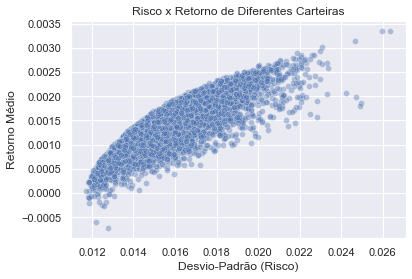

In [10]:
# simular carteiras com diferentes combinações de pesos dos ativos
n = len(mi)

mi_random_w = []
sigma_random_w = []

for i in range(10000):
    # Geramdo pesos aleatórios
    w = np.random.random(n) # gera n valores entre 0 e 1
    w = w/np.sum(w) # divide cada valor pela soma dos n valores para que a soma de w seja igual a 1
    
    # Calculando risco e retorno
    mi_random_w.append(np.sum(w*mi))
    sigma_random_w.append(np.sqrt(np.dot(w, np.dot(cov_matrix, w))))
    
# Gráfico
sns.scatterplot(x=sigma_random_w, y=mi_random_w,alpha=0.4)
plt.title('Risco x Retorno de Diferentes Carteiras')
plt.xlabel('Desvio-Padrão (Risco)')
plt.ylabel('Retorno Médio')
plt.show()

In [11]:
w_ini = np.array([1/len(mi)]*len(mi)) # definindo pesos iniciais

ret = 0.0025 # definindo o retorno desejado

constraints = [
                {'type': 'eq', 'fun': lambda x: sum(x) -1}, # primeira restrição: soma dos pesos deve ser igual a 1
                {'type': 'eq', 'fun': lambda x: sum(x*mi) -ret} # segunda restrição: retorno esperado deve ser igual ao retorno desejado
              ]

bounds = tuple((0,1) for x in range(len(w))) # definindo limites para os pesos

result = solver.minimize(f_obj_min_risk, w_ini,(cov_matrix), constraints=constraints, bounds=bounds, method='SLSQP')
result

     fun: 0.01900513619889989
     jac: array([0.00481062, 0.0162258 , 0.02779627, 0.00952299, 0.01043617])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.        , 0.09677297, 0.46995597, 0.1640386 , 0.26923246])

In [12]:
# peso dos ativos e risco da carteira para o retorno desejado
pesos = [round(w*100, 2) for w in result.x]
print(f'Pesos (%): {pesos}\nRisco (desvio-padrão) da carteira: {round(result.fun*100, 4)}%')

Pesos (%): [0.0, 9.68, 47.0, 16.4, 26.92]
Risco (desvio-padrão) da carteira: 1.9005%


Text(0, 0.5, 'Retorno Médio')

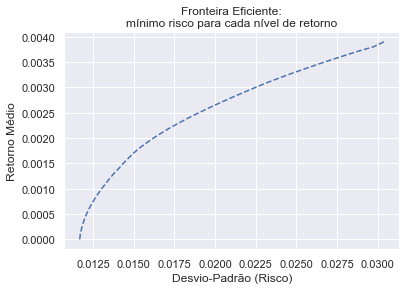

In [13]:
# fronteira eficiente: mínimo risco para diferentes níveis de retorno
ret_range = np.arange(0,0.004,0.0001)
sigma_w = []

for ret in ret_range:
    constraints = [
                    {'type': 'eq', 'fun': lambda x: sum(x) -1}, # primeira restrição: soma dos pesos deve ser igual a 1
                    {'type': 'eq', 'fun': lambda x: sum(x*mi) -ret} # segunda restrição: retorno esperado deve ser igual ao retorno desejado
                  ]
    
    result = solver.minimize(f_obj_min_risk, w_ini,(cov_matrix), constraints=constraints, bounds=bounds, method='SLSQP')
    sigma_w.append(result.fun)

plt.plot(sigma_w, ret_range, '--')
plt.title('Fronteira Eficiente:\nmínimo risco para cada nível de retorno')
plt.xlabel('Desvio-Padrão (Risco)')
plt.ylabel('Retorno Médio')

In [14]:
w_ini = np.array([1/len(mi)]*len(mi)) # definindo pesos iniciais

risk = 0.0190051362 # definindo o risco desejado

constraints = [
                {'type': 'eq', 'fun': lambda x: sum(x) -1}, # primeira restrição: soma dos pesos deve ser igual a 1
                {'type': 'eq', 'fun': lambda x: np.sqrt(np.dot(x, np.dot(cov_matrix, x))) - risk} # segunda restrição: risco esperado deve ser igual ao risco desejado
              ]

bounds = tuple((0,1) for x in range(len(w))) # definindo limites para os pesos

result = solver.minimize(f_obj_max_ret, w_ini,mi, constraints=constraints, bounds=bounds, method='SLSQP')
result

     fun: -0.002499670346455768
     jac: array([ 0.00118279, -0.00208787, -0.00385672, -0.00098787, -0.00120124])
 message: 'Optimization terminated successfully'
    nfev: 80
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([6.58839782e-17, 9.74350545e-02, 4.69937336e-01, 1.68103022e-01,
       2.64524588e-01])

In [15]:
# peso dos ativos e retorno da carteira para o risco desejado
pesos = [round(w*100, 2) for w in result.x]
print(f'Pesos (%): {pesos}\nRetorno médio esperado da carteira: {round(-result.fun*100, 4)}%')

Pesos (%): [0.0, 9.74, 46.99, 16.81, 26.45]
Retorno médio esperado da carteira: 0.25%


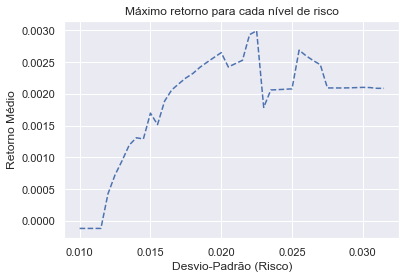

In [20]:
# fronteira eficiente: máximo retorno para diferentes níveis de risco
risk_range = np.arange(0.01,0.032,0.0005)
ret_w = []

for risk in risk_range:
    constraints = [
                    {'type': 'eq', 'fun': lambda x: sum(x) -1}, # primeira restrição: soma dos pesos deve ser igual a 1
                    {'type': 'eq', 'fun': lambda x: np.sqrt(np.dot(x, np.dot(cov_matrix, x))) -risk} # segunda restrição: risco esperado deve ser igual ao risco desejado
                  ]
    
    result = solver.minimize(f_obj_max_ret, w_ini,mi, constraints=constraints, bounds=bounds, method='SLSQP')
    ret_w.append(-result.fun)

sns.lineplot(x=risk_range, y=ret_w, ls='--')
plt.title('Máximo retorno para cada nível de risco')
plt.xlabel('Desvio-Padrão (Risco)')
plt.ylabel('Retorno Médio');

Diferentemente da otimização do portfólio através da minimização do risco para cada nível de retorno, a otimização através da maximização do retorno para cada nível de risco gerou pontos em que o retorno não cresce junto com o risco, e que, portanto, não fazem parte da fronteira eficiente.